# moped tutorial

In [1]:
import reprlib
import moped
import matplotlib.pyplot as plt
from pathlib import Path


def pretty_print(name, content):
    """Print a prettier version of descriptor and an object."""
    closing_dict = {
        "set": "}",
        "dict": "}",
        "list": "}",
    }
    content_type = type(content).__name__
    try:
        closing = closing_dict[content_type]
    except KeyError:
        closing = ""
    content = reprlib.repr(content)
    if len(content) > 70:
        content = content[:70] + " ... " + closing
    print(f"{name:<20}: {content}")

## Loading the database

We are using the metacyc database in this tutorial. Download links can be found at [biocyc](https://biocyc.org/download.shtml).

In [2]:
# Parsing metacyc can take a bit, so we cached the results here
metacyc_cache_path = Path(".") / "temp_metacyc.pickle"

if metacyc_cache_path.exists():
    metacyc = moped.load_model_from_pickle(metacyc_cache_path)
else:
    metacyc = moped.create_model_from_pgdb(pgdb_path="/home/marvin/Documents/metacyc/25.1/data/")
    moped.to_pickle(metacyc, metacyc_cache_path)
metacyc

Model: Model
    compounds: 11712
    reactions: 13280

## Inspecting the model 

Before you start working with your model, you should always take the time to take a look at it. You can access the information stored in your model directly from the objects themselves or from the model object itself.

In both cases we would like to stress that there are certain terms we are using throughout the software to keep a consistent interface:

- the **classes** of reactions and compounds are called `Reaction` and `Compound`
- the **objects** themselves are called `reaction` and `compound`
- the **identifiers** of those objects are called `reaction_id` and `compound_id`

So whenever you see a function use the keyword `reaction_id`, it expects a string, while a function that uses the keyword `reaction` will use the object.

Both reactions and compounds also have a `base_id`. This is the identifier without any prefixes and suffixes. 

### Getting information about compounds 

Let's take a look at the compound ATP. Since this is a vital compound in any metabolic network, we can expect to find it in multiple compartments. Let's check this with the `Model.get_compound_compartment_variants` method. This expects a `compound_base_id`.

In [3]:
metacyc.get_compound_compartment_variants("ATP")

{'ATP_c', 'ATP_e', 'ATP_p'}

As you can see below, if you want to access the compound in most other use cases, you will have to access it with its right compartment. In this case we are using the cytosol, which will have the suffix `_c`. To get all supported compartments and their suffixes you can take a look at `Model.compartments`.

We decided to always include a suffix instead of implicitly assuming the cytosol to follow the Python mantra `Explicit is better than implicit`.

In [4]:
compound = metacyc.compounds["ATP_c"]

pretty_print("Compartment", compound.compartment)
pretty_print("Formula", compound.formula)
pretty_print("Charge", compound.charge)
pretty_print("Compound rxns", compound.in_reaction)
pretty_print("Database links", compound.database_links)

Compartment         : 'CYTOSOL'
Formula             : {'C': 10, 'H': 12, 'N': 5, 'O': 13, ...}
Charge              : -4
Compound rxns       : {'1.13.12.7-RXN_c', '1.3.99.15-RXN_c', '1PFRUCTPHOSN-RXN_c', '2-FUROAT ... }
Database links      : {'BIGG': {'atp'}, 'CAS': {'56-65-5'}, 'CHEBI': {'30616'}, 'CHEMSPIDER' ... }


Alternatively, you can use model functions to get the same information

In [5]:
compound_id = "ATP_c"

pretty_print("Compartment", metacyc.get_compound_compartment(compound_id))
pretty_print("Formula", metacyc.get_compound_formula(compound_id))
pretty_print("Charge", metacyc.get_compound_charge(compound_id))
pretty_print("Compound rxns", metacyc.get_reactions_of_compound(compound_id))
pretty_print("Database links", metacyc.get_compound_database_links(compound_id))

Compartment         : 'CYTOSOL'
Formula             : {'C': 10, 'H': 12, 'N': 5, 'O': 13, ...}
Charge              : -4
Compound rxns       : {'1.13.12.7-RXN_c', '1.3.99.15-RXN_c', '1PFRUCTPHOSN-RXN_c', '2-FUROAT ... }
Database links      : {'BIGG': {'atp'}, 'CAS': {'56-65-5'}, 'CHEBI': {'30616'}, 'CHEMSPIDER' ... }


### Getting information about reactions 

Accessing reactions can be done similarly 

In [6]:
metacyc.get_reaction_compartment_variants("ATPSYN-RXN")

{'ATPSYN-RXN_c_p'}

In this case we have the double suffix `_c_p`. This means, that this is a transmembrane reaction, that has compounds in multiple compartments. Let's take a look at it:

In [7]:
reaction = metacyc.reactions["ATPSYN-RXN_c_p"]

pretty_print("Stoichiometries", reaction.compartment)
pretty_print("Gibbs 0", reaction.gibbs0)
pretty_print("Bounds", reaction.bounds)
pretty_print("Reversible", reaction.reversible)
pretty_print("Transmembrane", reaction.transmembrane)
pretty_print("Pathways", reaction.pathways)
pretty_print("Sequences", reaction.sequences)
pretty_print("Database links", reaction.database_links)

Stoichiometries     : ('CYTOSOL', 'PERIPLASM')
Gibbs 0             : -7.598816
Bounds              : (-1000, 1000)
Reversible          : True
Transmembrane       : True
Pathways            : {'PWY-7980'}
Sequences           : {'ATPA-MONOMER': 'MQLNSTEISELI...KGILDSFKATQSW', 'ATPB-MONOMER': 'MASE ... }
Database links      : {'METANETX-RXN': {'MNXR96136'}, 'RHEA': {'20855'}}


Alternatively, you can use model functions to get the same information

In [8]:
reaction_id = "ATPSYN-RXN_c_p"

pretty_print("Stoichiometries", metacyc.get_reaction_compartment(reaction_id))
pretty_print("Gibbs 0", metacyc.get_reaction_gibbs0(reaction_id))
pretty_print("Bounds", metacyc.get_reaction_bounds(reaction_id))
pretty_print("Reversible", metacyc.get_reaction_reversibility(reaction_id))
pretty_print("Pathways", metacyc.get_reaction_pathways(reaction_id))
pretty_print("Sequences", metacyc.get_reaction_sequences(reaction_id))
pretty_print("Reaction type", metacyc.get_reaction_types(reaction_id))
pretty_print("Database links", metacyc.get_reaction_database_links(reaction_id))

Stoichiometries     : ('CYTOSOL', 'PERIPLASM')
Gibbs 0             : -7.598816
Bounds              : (-1000, 1000)
Reversible          : True
Pathways            : {'PWY-7980'}
Sequences           : {'ATPA-MONOMER': 'MQLNSTEISELI...KGILDSFKATQSW', 'ATPB-MONOMER': 'MASE ... }
Reaction type       : ['Small-Molecule-Reactions', 'TR-13']
Database links      : {'METANETX-RXN': {'MNXR96136'}, 'RHEA': {'20855'}}


### Getting collections of objects

If you want to get all compounds or reactions of certain types, pathways or compartments, or want to now which types, pathways or compartments are in your model in the first place, we got you covered:

In [9]:
pretty_print("All compartments", metacyc.get_model_compartment_ids())
print()
pretty_print("Base compound ids", metacyc.get_base_compound_ids())
pretty_print("All compound types", metacyc.get_compound_type_ids())
print()
pretty_print("Base reaction ids", metacyc.get_base_reaction_ids())
pretty_print("All reaction types", metacyc.get_reaction_type_ids())
pretty_print("All pathways", metacyc.get_pathway_ids())

All compartments    : {'CYTOSOL', 'EXTRACELLULAR', 'PERIPLASM'}

Base compound ids   : {'+-5-oxo-1-2-campholide', '+-bornyl-diphosphate', '+-epi-beta-santale ... }
All compound types  : {'1-2-Beta-D-Glucans', '1-5-Galactofuran', '1-Acyl-2-Ara...yl-Glycerol ... }

Base reaction ids   : {'+-BORNEOL-DEHYDROGENASE-RXN', '+-NEOMENTHOL...DROGENASE-RXN', '+-SAB ... }
All reaction types  : {'Binding-Reactions', 'Chemical-Reactions', 'Complex-Processes', 'Comp ... }
All pathways        : ['PWY66-201', 'PWY-6993', 'PWY-6659', 'PWY-7517', 'PWY-5846', 'PWY-760 ... }


In [10]:
pretty_print("Cytosol compounds", metacyc.get_compounds_of_compartment("CYTOSOL"))
pretty_print("Type compounds", metacyc.get_compounds_of_type("All-Nucleosides"))
print()
pretty_print("Cytosol reactions", metacyc.get_reactions_of_compartment("CYTOSOL"))
pretty_print("Compound reactions", metacyc.get_reactions_of_compound("ATP_c"))
pretty_print("Pathway reactions", metacyc.get_reactions_of_pathway("PWY-101"))
pretty_print("Type reactions", metacyc.get_reactions_of_type("TR-13"))

Cytosol compounds   : ['ALLANTOIN_c', 'CPD-12485_c', 'CPD-15973_c', 'CPD-15993_c', 'CPD-1597 ... }
Type compounds      : {'ADP_c', 'ADP_e', 'ADP_p', 'AMP_c', 'AMP_p', 'CAMP_c', ...}

Cytosol reactions   : {'+-BORNEOL-DE...OGENASE-RXN_c', '+-NEOMENTHOL...OGENASE-RXN_c', '+-SA ... }
Compound reactions  : {'1.13.12.7-RXN_c', '1.3.99.15-RXN_c', '1PFRUCTPHOSN-RXN_c', '2-FUROAT ... }
Pathway reactions   : {'1.18.1.2-RXN_c', '1.18.1.2-RXN_e', 'PLASTOQUINOL...CTASE-RXN_c_p', ' ... }
Type reactions      : {'3.6.3.11-RXN_c_e', '3.6.3.15-RXN_c_e', '3.6.3.16-RXN_c_p', '3.6.3.26 ... }


## Model reconstruction

Analysing metacyc is fun and insightful, but usually we are more interested in analysing a single organism. For this we can reconstruct a model from a given genome. We will do this by blasting each monomer sequence of every Metacyc enzyme against the genome, collecting only the ones that fulfill the cutoff criteria we set and then only select those reactions from metacyc, for which all sequences of the corresponding enzyme complex are found. Sounds complicated? Don't worry, it's only a single function call to do this!

In [11]:
ecoli_genome = "/home/marvin/Documents/genomes/ecoli/k12-mg1655.fasta"

ecoli = moped.create_submodel_from_genome(
    model=metacyc,
    genome_file=ecoli_genome,
    name="k12",
    max_evalue=1e-06,  # Default parameter
    min_coverage=85,  # Default parameter
    min_pident=85,  # Default parameter
    cache_blast_results=True,  # Cache blast results, as they are computationally expensive
)

ecoli

Model: k12
    compounds: 2886
    reactions: 2699

Do play around with the cutoff criteria if you feel that your model lacks reactions or exhibits reactions you would not expect

In [12]:
ecoli_lower_limit = moped.create_submodel_from_genome(
    model=metacyc,
    genome_file=ecoli_genome,
    name="k12",
    max_evalue=1e-12,
    min_coverage=85,
    min_pident=99,
    cache_blast_results=True,
)
ecoli_lower_limit

Model: k12
    compounds: 2881
    reactions: 2694

In [13]:
ecoli_upper_limit = moped.create_submodel_from_genome(
    model=metacyc,
    genome_file=ecoli_genome,
    name="k12",
    max_evalue=1e-12,
    min_coverage=85,
    min_pident=0,
    cache_blast_results=True,
)
ecoli_upper_limit

Model: k12
    compounds: 4245
    reactions: 3919

## Topological analysis

For topological analyses it is important to duplicate both the model as well as the reference.

In [14]:
metacyc_topo = moped.to_topological(metacyc)
ecoli_topo = moped.to_topological(ecoli)

### Gapfilling

With our automatic reconstruction from blasting it can happen that the network is not connected, as single important reactions may have not been found. To solve this problem, we can gap fill our model to be able to produce a known biomass composition or any other set of target metabolites.

If you want to automatically add all the essential reactions, use the `Model.gapfilling` method, otherwise you can get the reactions with the `Model.get_gapfilling_reactions` method, inspect the results and add all reactions you deem as appropriate with `Model.add_reactions_from_reference`.

In [15]:
targets = list(metacyc.get_biomass_template("ecoli"))
seed = list(metacyc.get_minimal_seed("ALPHA-GLUCOSE_c")) + metacyc.get_weak_cofactor_duplications()

new_reactions = moped.get_gapfilling_reactions(
    model=ecoli_topo,
    reference_model=metacyc_topo,
    seed=seed,
    targets=targets,
)
print(new_reactions)
ecoli.add_reactions_from_reference(metacyc, new_reactions)

2021-12-13 10:28:59 - WARNING - Could not produce ['PHE_c', 'LYS_c', 'ARG_c', 'VAL_c', 'ACETYL-COA_c', 'NAD_c', 'MALONYL-COA_c', 'GTP_c', 'NADPH_c', 'UTP_c', 'PRO_c', 'MET_c', 'GLN_c', 'LEU_c', 'NADP_c', 'TRP_c', 'ILE_c', 'ASN_c', 'ADP_c', 'HIS_c', 'TYR_c', 'CYS_c', 'CTP_c', 'ATP_c'] in reference database


['METHYLASPARTATE-MUTASE-RXN_c', 'GLUCOSE-OXIDASE-RXN_c', 'GLUCONATE-DEHYDRATASE-RXN_c', 'RXN-13328_c', 'RXN-15310_c', 'RXN-15311_c', '2.6.1.37-RXN_c', 'RXN-11811_c', 'RXN-8092_c', 'SERINE-GLYOXYLATE-AMINOTRANSFERASE-RXN_c', 'PHOSPHONOACETALDEHYDE-HYDROLASE-RXN_c', 'ALDOSE-1-EPIMERASE-RXN_c']


### Scope

In [16]:
scope = moped.scope(ecoli_topo, ["WATER_c", "GLT_c"] + metacyc.get_strong_cofactor_duplications())

pretty_print("Reactions found", scope.reactions)
pretty_print("Compounds found", scope.compounds)

Reactions found     : {'GLUTRACE-RXN_c', 'GLUTRACE-RXN_c__rev__', 'TRANS-RXN-145_c_p', 'TRAN ... }
Compounds found     : {'D-GLT_c', 'WATER_p'}


100%|██████████| 2887/2887 [00:43<00:00, 66.94it/s]


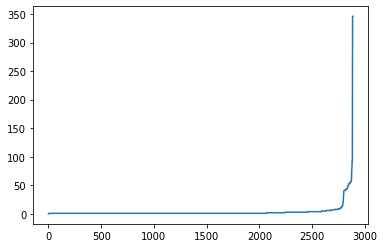

In [18]:
seeds = [["WATER_c", i] + ecoli.get_strong_cofactor_duplications() for i in ecoli.compounds]
scopes = moped.multiple_scopes(ecoli_topo, seeds=seeds)

fig, ax = plt.subplots()
ax.plot(range(len(seeds)), sorted([len(res.compounds) for res in scopes.values()]))
plt.show()

## Flux analysis

With the cobrapy toolbox

In [20]:
# Add a mock atpase for testing purposes
ecoli.add_reaction(
    moped.Reaction(
        id="mock_atpase_c",
        base_id="mock_atpase",
        stoichiometries={
            "ATP_c": -1,
            "WATER_c": -1,
            "ADP_c": 1,
            "Pi_c": 1,
            "PROTON_c": 1,
        },
    )
)

# Set an objective
ecoli.add_reaction(
    moped.Reaction(
        id="BIOMASS",
        base_id="BIOMASS",
        stoichiometries=ecoli.get_biomass_template("ecoli"),
    )
)
ecoli.set_objective({"BIOMASS": 1})

for compound_id in ecoli.get_compounds_of_compartment("CYTOSOL"):
    ecoli.add_efflux(compound_id, "EXTRACELLULAR")


# Add medium reactions
for compound_id in metacyc.get_minimal_seed("ALPHA-GLUCOSE_c"):
    try:
        ecoli.add_medium_component(compound_id, "EXTRACELLULAR")
    except KeyError:
        print(compound_id)
        pass

CA+2_c


In [21]:
cm = moped.to_cobra(ecoli)
solution = cm.optimize()
solution

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


<Solution 0.000 at 0x7f39ad0b3f70>

In [22]:
print(moped.get_influx_reactions(ecoli, solution, sort_result=True))
print()
print(moped.get_efflux_reactions(ecoli, solution, sort_result=True))

Series([], Name: fluxes, dtype: float64)

Series([], Name: fluxes, dtype: float64)


In [23]:
# Now investigate the flux solution

pretty_print(
    "Producing reactions",
    moped.get_producing_reactions(ecoli, solution, compound_id="ATP_c"),
)
pretty_print(
    "Consuming reactions",
    moped.get_consuming_reactions(ecoli, solution, compound_id="ATP_c"),
)

Producing reactions : {}
Consuming reactions : {}


In [24]:
# Test your solution for energy generating cycles

cm.reactions.BIOMASS.objective_coefficient = 0
cm.reactions.mock_atpase_c.objective_coefficient = 1
cm.reactions.__getattr__("EX_ALPHA-GLUCOSE_e").bounds = (0.0, 0.0)

solution = cm.optimize()
solution

<Solution 1000.000 at 0x7f39acd46610>

## Kinetic analysis

This utilizes our [modelbase](https://gitlab.com/ebenhoeh/modelbase) package for ODE analysis

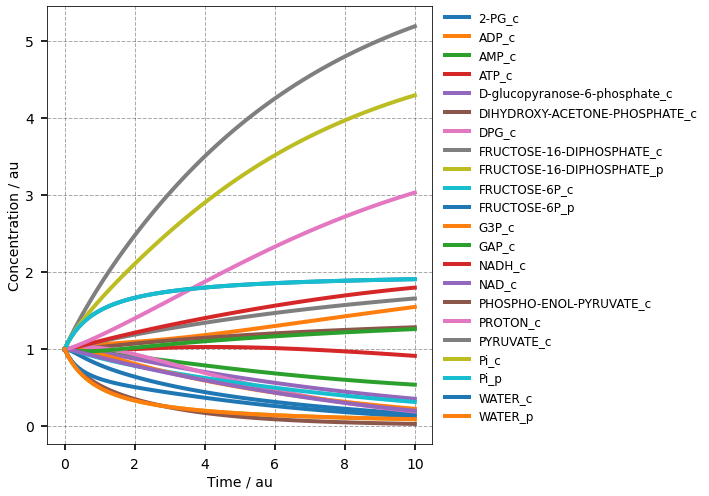

In [34]:
import modelbase.ode as ode

# Create a subset of the glycolysis pathway

glycolysis = metacyc.create_submodel(metacyc.get_reactions_of_pathway("GLYCOLYSIS"))
km = moped.to_kinetic_model(glycolysis)

# Create a set of initial concentrations
y0 = {i: 1 for i in km.get_compounds()}
y0["GLC_6_P_c"] = 5

# Simulate the model
s = ode.Simulator(km)
s.initialise(y0)
s.simulate(10)
fig, ax = s.plot(xlabel="Time / au", ylabel="Concentration / au")
plt.show()